In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#!pip install sklearn
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

### Load datasets

In [3]:
iris = pd.read_csv("Iris Dataset.csv")
weather = pd.read_csv("weather.csv")

## Analysis - iris

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### unique values in column "species"

In [7]:
column_values = iris[["species"]].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['setosa', 'versicolor', 'virginica'], dtype=object)

De data set van "Iris" heeft 150 records en 5 kolommen en bestaat uit allemaal kolommen over de eigenschappen van de iris plant. De waarden van bijna alle kolommen zijn in de datatype float opgeslagen, behalve "species" dat als object opgeslagen is, ofterwijl, in deze kolom zijn string waarden opgeslagen. Alle species die zijn opgeslagen zijn {setosa, versicolor, virginica}. De gemiddelde waarden en de distributie van de hoogte van de waarden zijn hierboven onder iris.describe() te vinden.

## Analysis - weather

In [8]:
weather.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [9]:
weather.describe()

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [10]:
weather.dtypes

outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

#### unique values in column "outlook"

In [11]:
column_values_outlook = weather[["outlook"]].values.ravel()
unique_values_outlook =  pd.unique(column_values_outlook)

In [12]:
unique_values_outlook

array(['sunny', 'overcast', 'rainy'], dtype=object)

De data set van "Weather" heeft 14 records en 5 kolommen en bestaat uit allemaal kolommen over het weer. De kolom "outlook" geeft in een string (object) weer wat voor weer het wordt, de kolom "temperature" en "humidity" geven in een Integer weer hoe warm het is (in fahrenheit) en hoe vochtig de lucht is (in % water in de lucht). Dit betekent misschien wel dat de temperatuur van fahrenheit naar celcius omgerekend moet worden. Als laatst is de kolom "windy" opgeslagen als een boolean (ja of nee) en de kolom play een string of object (ja of nee) dat ook als een boolean gezien kan worden. Alle outlooks die zijn opgeslagen zijn {sunny, overcast, rainy}. De gemiddelde waarden en de distributie van de hoogte van de waarden zijn hierboven onder weather.describe() te vinden.

## Linear Regression Iris

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Correlations

Eerst proberen we de correlaties van elke kolomcombinatie te vinden

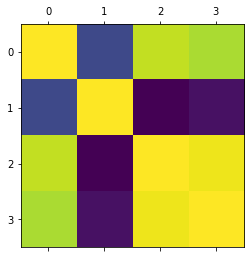

In [14]:
plt.matshow(iris.corr())
plt.show()

In [15]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


we vinden een correlatie hoog bij de 1 of de -1 bij petal_with en petal_length

In [16]:
X = np.array(iris["petal_length"]).reshape(-1,1)
y = np.array(iris["petal_width"])
reg = LinearRegression().fit(X, y)

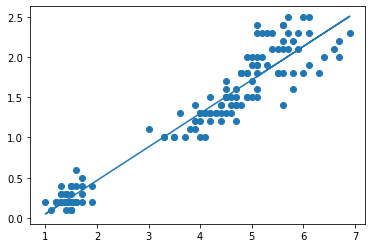

In [17]:
plt.plot(X,reg.predict(X))
plt.scatter(X,y)

## Classification Weather - on "weather suited for football"

In [18]:
weather.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


##### one hot encoding

Eerst passen we one hot encoding toe om de waarden in "outlook" numeriek te maken en te verdelen in 4 kolommen.

_

In [19]:
y = pd.get_dummies(weather.outlook, prefix='outlook')
# concatenate y and original weather dataset
weather_onehotencoding = pd.concat([y,weather],axis=1)
# drop unnecessary column "outlook"
weather_onehotencoding.drop("outlook",inplace=True,axis=1)
y.head()

,outlook_overcast,outlook_rainy,outlook_sunny
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


In [20]:
weather_onehotencoding.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temperature,humidity,windy,play
0,0,0,1,85,85,False,no
1,0,0,1,80,90,True,no
2,1,0,0,83,86,False,yes
3,0,1,0,70,96,False,yes
4,0,1,0,68,80,False,yes


In [21]:
feature_names = weather_onehotencoding.columns[:-1]
target_name = "play"

X = np.array(weather_onehotencoding[feature_names])
y = np.array(weather_onehotencoding[target_name])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [22]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_4 <= 82.50
|   |   |--- feature_3 <= 66.50
|   |   |   |--- class: no
|   |   |--- feature_3 >  66.50
|   |   |   |--- class: yes
|   |--- feature_4 >  82.50
|   |   |--- feature_4 <= 95.50
|   |   |   |--- class: no
|   |   |--- feature_4 >  95.50
|   |   |   |--- class: yes
|--- feature_0 >  0.50
|   |--- class: yes



Voordat we onze decision tree visualiseren moeten we vaststellen wat de class features zijn. Uit de decision tree zien we dat class op index 1 voorspelt wordt als outlook_overcast>0.5. Uit de text_prepresentation volgt dat in hetzelfde geval class "play" wordt voorspelt. Zo kunnen we vaststellen dat op index 1 wel gevoetbalt wordt. Dus onze class_features is: <br><br> [play_yes, play_no]

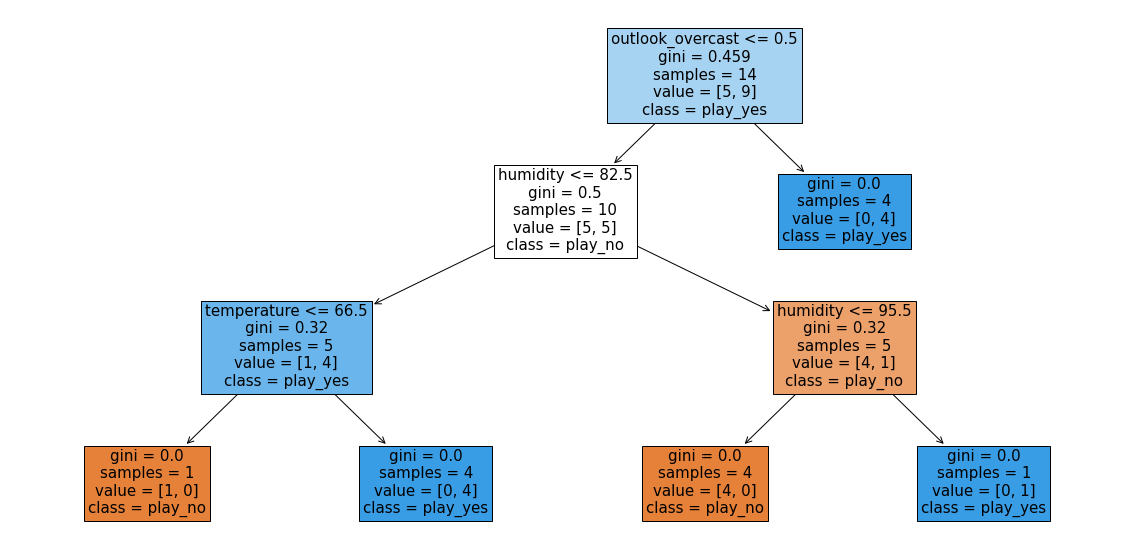

In [23]:
fig, axe = plt.subplots(figsize=(20,10))
DT = tree.plot_tree(clf,feature_names = feature_names,
                    class_names = ["play_no","play_yes"],
                    filled=True,
                    ax = axe,
                    fontsize=15)

Uit de decision tree kunnen we afleiden wanneer er gevoetbalt kan worden. Als het bewolkt is wordt er in ieder geval niet gevoetbalt. Als de luchtvochtigheid lager is dan 82.5% en de temperatuur lager is dan 66.5 fahrenheit, dan wordt er niet gevoetbald. Als de luchtvochtigheid lager is dan 82.5% en de temperatuur hoger is dan 66.5 fahrenheit, dan wordt er wel gevoetbalt. Als de luchtvochtigheid tussen 66.6% en 95.5% ligt dan wordt er niet gevoetbald. Als de luchtvochtigheid hoger is dan 95.5%, dan wordt er wel gevoetbalt. 

## KMeans - iris soort plant onderzoeken

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
input_features = iris.columns[:-1]
target_feature = "species"
labels = ['setosa', 'versicolor', 'virginica']

X = np.array(iris[input_features])
y = np.array(iris[target_feature])

Het aantal clusters dat voorspelt moet worden zijn dus 3: {'setosa', 'versicolor', 'virginica'}. Dus stellen we n_clusters in op 3.

In [26]:
kmeans = KMeans(n_clusters=len(labels), random_state=0).fit(X)

In [27]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Het KMeans algoritme heeft dus voor alle datapunten de labels {0,1,2} voorspelt. KMeans weet natuurlijk niet welke soort plant bij welk datapunt hoort. Het algoritme bekijkt enkel naar clusteringen van data en koppelt hier een arbitraire label aan. Het is aan ons dus de taak deze labels te koppelen aan de labels {'setosa', 'versicolor', 'virginica'}.

Uit de data vinden we veel overeenkomsten met label 0 -> versicolor, label 1 -> setosa, label 2 -> virginica

## KMeans - weather outlook voorspellen 

In [28]:
weather.head(100)

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


Om kolom "play" mee te nemen voor het clusteren van de outlook moet die eerst naar een boolean omgezet worden.

In [29]:
weather_transf = weather.copy()
weather_transf.loc[weather_transf.play == "yes", 'play'] = 1
weather_transf.loc[weather_transf.play == "no", 'play'] = 0
weather_transf["play"] = weather_transf["play"].astype("bool")

In [30]:
weather_transf.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,False
1,sunny,80,90,True,False
2,overcast,83,86,False,True
3,rainy,70,96,False,True
4,rainy,68,80,False,True


In [32]:
input_features = weather.columns[1:]
target_feature = "outlook"
labels = ['sunny', 'overcast', 'rainy']

X = np.array(weather_transf[input_features])
y = np.array(weather_transf[target_feature])

Het aantal clusters dat voorspelt moet worden zijn dus 3: {'sunny', 'overcast', 'rainy'}. Dus stellen we n_clusters in op 3.

In [33]:
kmeans = KMeans(n_clusters=len(labels), random_state=0).fit(X)

In [34]:
kmeans.labels_

array([2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1])

Het KMeans algoritme heeft dus voor alle datapunten de labels {0,1,2} voorspelt. KMeans weet natuurlijk niet welke outlook bij welk datapunt hoort. Het is aan ons dus de taak deze labels te koppelen aan de labels {'sunny', 'overcast', 'rainy}.

In [35]:
for i in range(len(kmeans.labels_)):
    print(kmeans.labels_[i], weather_transf["outlook"].iloc[i])

2 sunny
2 sunny
2 overcast
1 rainy
0 rainy
0 rainy
0 overcast
1 sunny
0 sunny
2 rainy
0 sunny
1 overcast
2 overcast
1 rainy


Uit de data kunnen we geen overeenkomsten vinden tussen de KMeans labels en de originele labels. Het model is dus niet nauwkeurig genoeg. Dit zou kunnen komen doordat er maar 14 datapunten zijn waarop het model getraind is terwijl een KMeans model veel meer input data nodig heeft om goede clusters te vinden.